# Mevgal Greek Yogurt Product Sales Performance Analysis

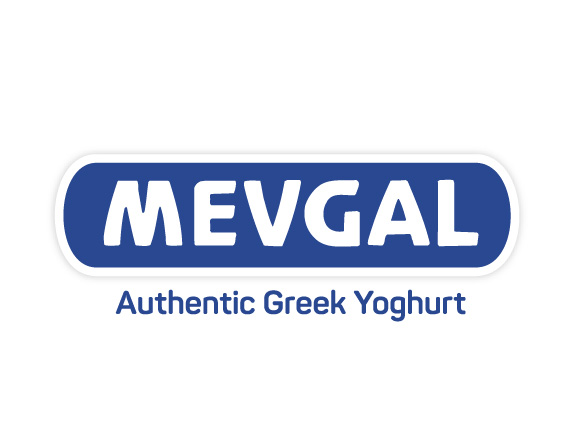

# Summary

The analysis focuses on Mevgal, a Greek yogurt brand, and its sales data for 7 products during the years 2020-2022. The heart of the analysis lies in the exploratory data analysis section, which delves into sales and distribution patterns, total shipped quantities, package sizes, sales trends over time, and sales forecasting.



---



# I. Company Introduction and Business Problem Definition




**Company Introduction**

MEVGAL is a Greek dairy product manufacturer. It manufactures and sells a wide variety of pasteurized dairy products, including milk, yogurt (both traditional Greek and European), cheeses, desserts, and rice puddings. MEVGAL now produces one in every five yogurts exported by Greece. The company owns a significant share in the Greek Yogurt category in markets ranging from Europe to America and Asia.

# II. Data and its Source






**Description of the Data**

The dataset comprises information pertaining to the daily sales of 7 dairy product codes sold by MEVGAL. This information was gathered by the logistics division and agencies operating within the industrial infrastructure responsible for overseeing the production of each product code. These products featured in the dataset encompass daily sales and logistics data for various yogurt-based stock items. Each file within the dataset provides logistics information for a specific product on a daily basis, covering a span of three years from 2020 to 2022.

It is also important for MEVGAL to ensure that the data collection process conducted is in an ethical and compliant manner, adhering to data privacy laws and regulations. It's worth mentioning that, the dataset was anonymized considering the privacy requirement of the data owner (MEVGAL), therefore it might not 100% represent the company's performance.

**Dataset Overview**

The following table explains each feature in the original dataset.

|Index| Feature           | Description | Unit |
|:----------------| :---------------- | :--------| :----: |
|1| Day               |  day of the month   | / |
|2| Month             |  month of the year  | / |
|3| Year              |  year    | / |
| 4| daily_unit_sales |  Daily sales - the amount of products, measured in units, that during that specific day were sold   | units |
| 5| previous_year_daily_unit_sales |  Previous Year's sales - the amount of products, measured in units, that during that specific day were sold, the previous year  | units |
| 6| percentage_difference_daily_unit_sales |  The percentage difference between the two above values  | % |
| 7| daily_unit_sales_kg |  The amount of products, measured in kilograms, that during that specific day were sold  | kg |
| 8| previous_year_daily_unit_sales_kg | Previous Year's sales - the amount of products, measured in kilograms, that during that specific day were sold, the previous year | kg |
| 9|  percentage_difference_daily_unit_sales_kg | The percentage difference between the two above values | % |
| 10|  daily_unit_returns_kg | The percentage of the products (in kg) that were shipped to selling points and were returned | %|
| 11| previous_year_daily_unit_returns_kg | The percentage of the products (in kg) that were shipped to selling points and were returned the previous year | % |
| 12| points_of_distribution | The amount of sales representatives through which the product was sold to the market that day | / |
| 13| previous_year_points_of_distribution | The amount of sales representatives through which the product was sold to the market for the same day in the previous year | / |

**Data Source**

Dairy Supply Chain Sales Dataset. Direct access link here: https://zenodo.org/record/7853252. The data is about the sales of MEVGAL products - https://mevgal.gr/ ; Authors from the University of Western Macedonia published the dataset on ITHACA - https://ithaca.ece.uowm.gr/, and were responsible for the dataset.


---



# III. Data Cleaning and Transformation



## A. Import the Data
We have data in 7 folders corresponding to the 7 products and each folder has 3 Excel files corresponding to daily data for the years 2020 - 2022.

In [1]:
import pandas as pd
import numpy as np

# Base URL where the Excel files are stored on GitHub
base_url = 'https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/MEVGAL-Dairy-Sales/'

# Define the range of product IDs and years
product_ids = range(1, 8)      # Products 1 through 7
years = range(2020, 2023)      # Years 2020 through 2022
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Initialize a list to hold individual DataFrames
df_list = []


for product_id in product_ids:
    for year in years:
        # Construct the filename and URL
        filename = f'product{product_id}-{year}.xlsx'
        url = f'{base_url}{filename}'

        try:
            # Read the Excel file from the URL into a DataFrame
            df_ = pd.read_excel(url)

            # Add the 'product_id' column
            df_['product_id'] = product_id

            # Drop rows where 'Day', 'Month', or 'Year' are missing
            df_.dropna(subset=['Day', 'Month', 'Year'], inplace=True)

            # Convert 'Day' and 'Year' to integers
            df_['Day'] = pd.to_numeric(df_['Day']).astype('Int64')
            df_['Year'] = pd.to_numeric(df_['Year']).astype('Int64')

            # After conversion, drop rows where 'Day' or 'Year' couldn't be converted
            df_.dropna(subset=['Day', 'Year'], inplace=True)

            # Apply the mapping to the 'Month' column
            df_['month'] = df_['Month'].map(month_map)

            # Create a 'Date' column from 'Day', 'Month', and 'Year'
            # This will automatically parse the month names
            df_['Date'] = pd.to_datetime(df_[['Year', 'month', 'Day']])


            # Append the DataFrame to the list
            df_list.append(df_)

            print(f'Successfully read {filename}')

        except Exception as e:
            # Handle exceptions (e.g., file not found) and continue
            print(f'Failed to read {filename}: {e}')

# Concatenate all DataFrames into a single DataFrame
if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print("All files have been successfully merged.")
else:
    df = pd.DataFrame()  # Empty DataFrame if no files were read
    print("No data was merged. Please check the file URLs and availability.")

df.drop(columns=['Day', 'Month', 'Year', 'month', 'previous_year_points_of_distribution', 'percentage_difference_daily_unit_sales_kg', 'percentage_difference_daily_unit_sales', 'previous_points_of_distribution'], inplace=True)

# Move the 'Date' column to be the first column
df = df[['Date'] + [col for col in df.columns if col != 'Date']]

df

Successfully read product1-2020.xlsx
Successfully read product1-2021.xlsx
Successfully read product1-2022.xlsx
Successfully read product2-2020.xlsx
Successfully read product2-2021.xlsx
Successfully read product2-2022.xlsx
Successfully read product3-2020.xlsx
Successfully read product3-2021.xlsx
Successfully read product3-2022.xlsx
Successfully read product4-2020.xlsx
Successfully read product4-2021.xlsx
Successfully read product4-2022.xlsx
Successfully read product5-2020.xlsx
Successfully read product5-2021.xlsx
Successfully read product5-2022.xlsx
Successfully read product6-2020.xlsx
Successfully read product6-2021.xlsx
Successfully read product6-2022.xlsx
Successfully read product7-2020.xlsx
Successfully read product7-2021.xlsx
Successfully read product7-2022.xlsx
All files have been successfully merged.


,Date,daily_unit_sales,previous_year_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,daily_unit_returns_kg,previous_year_daily_unit_returns_kg,points_of_distribution,product_id
0,2020-01-01,55.0,NaN,33.00,NaN,NaN,NaN,5.0,1
1,2020-01-02,2028.0,NaN,1216.80,NaN,NaN,NaN,29.0,1
2,2020-01-03,2848.0,NaN,1708.80,NaN,NaN,NaN,672.0,1
3,2020-01-04,2154.0,NaN,1292.40,NaN,NaN,NaN,532.0,1
4,2020-01-05,-9.0,NaN,-5.40,NaN,NaN,NaN,2.0,1
...,...,...,...,...,...,...,...,...,...
7548,2022-12-27,1016.0,1605.0,609.60,963.00,0.0,0.001866,23.0,7
7549,2022-12-28,2097.0,3694.0,461.34,812.68,0.020833,0.061778,428.0,7
7550,2022-12-29,3849.0,1909.0,846.78,419.98,0.023302,0.080443,383.0,7
7551,2022-12-30,1372.0,3599.0,301.84,791.78,0.026734,0.055092,321.0,7


In [2]:
df.isna().sum()

,0
Date,0
daily_unit_sales,14
previous_year_daily_unit_sales,2192
daily_unit_sales_kg,30
previous_year_daily_unit_sales_kg,2578
daily_unit_returns_kg,755
previous_year_daily_unit_returns_kg,2216
points_of_distribution,392
product_id,0


To ensure there are no implicit missing values:

In [3]:
min_date = df['Date'].min()
max_date = df['Date'].max()
full_date_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Create a MultiIndex of all product_id and Date combinations
multi_index = pd.MultiIndex.from_product(
    [df['product_id'].unique(), full_date_range],
    names=['product_id', 'Date'])

# Reindex the DataFrame to include all combinations
df.set_index(['product_id', 'Date'], inplace=True)
df = df.reindex(multi_index).reset_index()
df.isna().sum()

,0
product_id,0
Date,0
daily_unit_sales,133
previous_year_daily_unit_sales,2311
daily_unit_sales_kg,149
previous_year_daily_unit_sales_kg,2697
daily_unit_returns_kg,874
previous_year_daily_unit_returns_kg,2335
points_of_distribution,511


Let's do some data imputation (for most of these columns a 0 imputation makes the most sense but such an important decision needs to be discussed with the stackholders):

In [4]:
df.loc[df['daily_unit_sales']<0, 'daily_unit_sales'] = 0
df['daily_unit_sales'] = df['daily_unit_sales'].fillna(0)
df['daily_unit_sales_kg'] = df['daily_unit_sales_kg'].fillna(0)
df['daily_unit_returns_kg'] = df['daily_unit_returns_kg'].fillna(0)
df['points_of_distribution'] = df['points_of_distribution'].fillna(0)
df.isna().sum()

,0
product_id,0
Date,0
daily_unit_sales,0
previous_year_daily_unit_sales,2311
daily_unit_sales_kg,0
previous_year_daily_unit_sales_kg,2697
daily_unit_returns_kg,0
previous_year_daily_unit_returns_kg,2335
points_of_distribution,0


In [5]:
df[df['Date'].dt.year > 2020].isna().sum()

,0
product_id,0
Date,0
daily_unit_sales,0
previous_year_daily_unit_sales,111
daily_unit_sales_kg,0
previous_year_daily_unit_sales_kg,135
daily_unit_returns_kg,0
previous_year_daily_unit_returns_kg,135
points_of_distribution,0


Let's impute the missing vlaues for previous_year_* by 0 past the first year (2020). We will leave the 2020 missing values for the previous year in since we actually don't have those values. Most of the other ones were created due to implcit missing values.

In [6]:
df.drop(columns=['previous_year_daily_unit_sales', 'previous_year_daily_unit_sales_kg', 'previous_year_daily_unit_returns_kg'], inplace=True)

# Step 1: Create a Previous Year Date Column
df['Date_prev_year'] = df['Date'] - pd.DateOffset(years=1)

# Step 2: Merge the DataFrame with Itself to Get Previous Year Sales
# Select relevant columns for merging
df_prev_year = df[['product_id', 'Date', 'daily_unit_sales', 'daily_unit_sales_kg', 'daily_unit_returns_kg']].copy()
df_prev_year.rename(columns={'Date': 'Date_prev_year', 'daily_unit_sales': 'previous_year_daily_unit_sales', 'daily_unit_sales_kg': 'previous_year_daily_unit_sales_kg', 'daily_unit_returns_kg':'previous_year_daily_unit_returns_kg'}, inplace=True)

# Perform the merge
df = pd.merge(
    df,
    df_prev_year,
    on=['product_id', 'Date_prev_year'],
    how='left'
)

# Step 4: Clean Up Temporary Columns and df
df.drop(columns=['Date_prev_year'], inplace=True)
del df_prev_year

df = df[['Date', 'product_id', 'daily_unit_sales', 'previous_year_daily_unit_sales', 'daily_unit_sales_kg', 'previous_year_daily_unit_sales_kg', 'daily_unit_returns_kg', 'previous_year_daily_unit_returns_kg', 'points_of_distribution']]
df.sort_values('Date', inplace=True)
df.isna().sum()

,0
Date,0
product_id,0
daily_unit_sales,0
previous_year_daily_unit_sales,2562
daily_unit_sales_kg,0
previous_year_daily_unit_sales_kg,2562
daily_unit_returns_kg,0
previous_year_daily_unit_returns_kg,2562
points_of_distribution,0


In [7]:
df[df['Date'].dt.year > 2020].isna().sum()

,0
Date,0
product_id,0
daily_unit_sales,0
previous_year_daily_unit_sales,0
daily_unit_sales_kg,0
previous_year_daily_unit_sales_kg,0
daily_unit_returns_kg,0
previous_year_daily_unit_returns_kg,0
points_of_distribution,0


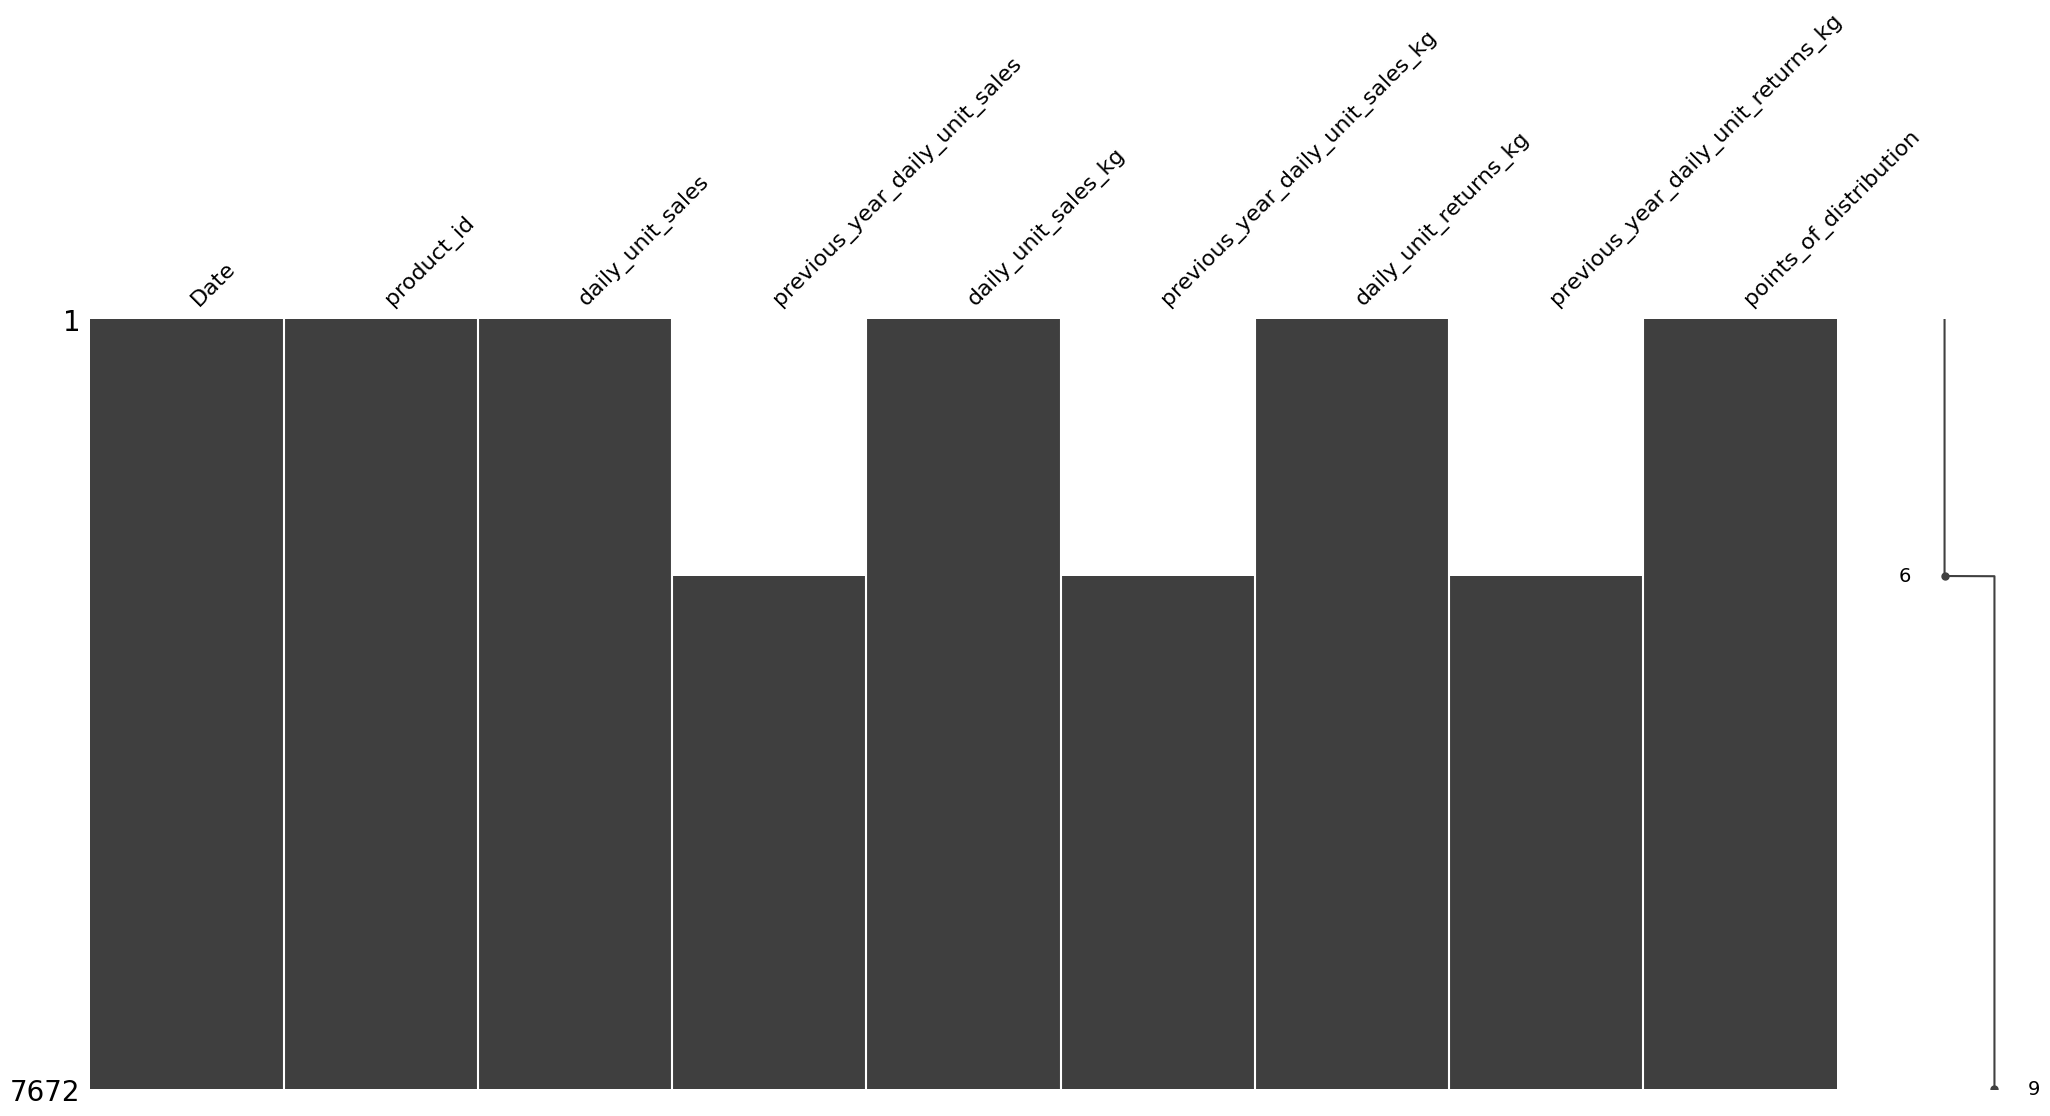

In [8]:
import missingno as msno

msno.matrix(df);

In [10]:
df.describe()

,Date,product_id,daily_unit_sales,previous_year_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,points_of_distribution
count,7672,7672.00000,7672.000000,5110.000000,7672.000000,5110.000000,7672.000000
mean,2021-07-01 12:00:00,4.00000,1736.795478,1607.365441,933.909315,919.793552,456.160584
min,2020-01-01 00:00:00,1.00000,0.000000,0.000000,-36.000000,-36.000000,0.000000
25%,2020-09-30 18:00:00,2.00000,747.000000,749.191667,487.200000,482.400000,153.000000
50%,2021-07-01 12:00:00,4.00000,1270.250000,1205.500000,799.530000,765.600000,411.000000
75%,2022-04-01 06:00:00,6.00000,2346.250000,2148.666667,1231.850000,1163.435000,664.000000
max,2022-12-31 00:00:00,7.00000,10206.000000,8322.000000,4978.800000,4228.800000,3003.000000
std,NaN,2.00013,1426.048795,1213.794286,623.765009,629.922724,406.033485


In [12]:
df.to_csv('products-2020-2022.csv', index=False)